# 군집분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df_raw=pd.read_csv('/home/pirl/test/데이터파일/직무능력평가.csv')

In [3]:
scaler=StandardScaler()
df_raw_scaled=scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [4]:
df_raw_y=df_raw_scaled[:,0]
df_raw_x=df_raw_scaled[:,1::]

Text(0, 0.5, 'sample index')

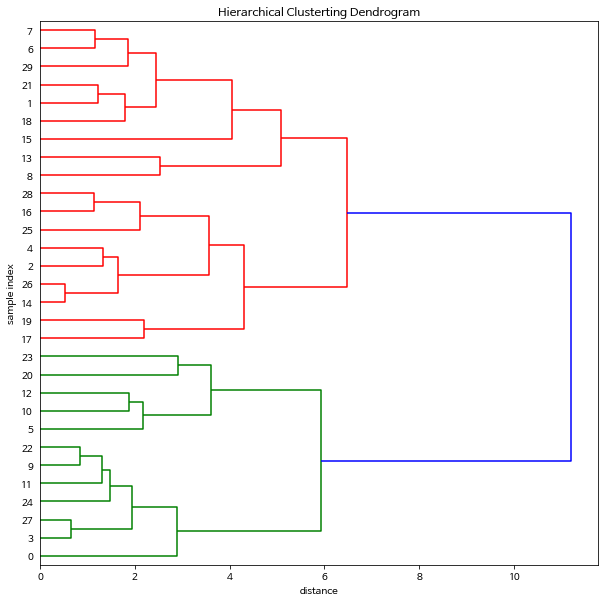

In [7]:
Z_ward=linkage(df_raw_x,method='ward', metric='euclidean')
Z_average=linkage(df_raw_x,method='average', metric='euclidean')
Z_Minkowski=linkage(df_raw_x, method='average',metric='minkowski')

plt.figure(figsize=(10,10))
ax=plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clusterting Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

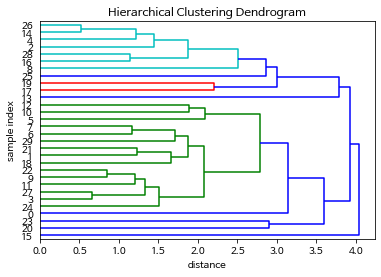

In [8]:
dendrogram(Z_average,leaf_font_size=10,orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

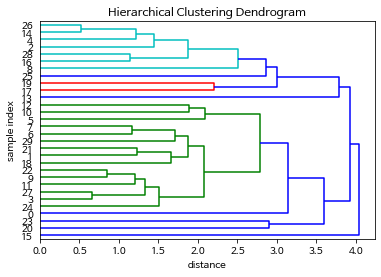

In [9]:
dendrogram(Z_Minkowski,leaf_font_size=10,orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [10]:
cluster_hierarchical=fcluster(Z=Z_ward, t=5,criterion='distance')

df_raw['ClusterHierarchical']=cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [11]:
ds_summary_hc=df_raw.groupby('ClusterHierarchical').agg(['min','mean','max'])

level0=ds_summary_hc.columns.get_level_values(0)
level1=ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns=level0+'_'+level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [12]:
n_iter_cluster=15
cluster_range=[i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)
ds_error=pd.DataFrame({'NumberofCluster':cluster_range, 'Error':clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.932631
3,4,78.350687
4,5,67.977342
5,6,57.242014
6,7,51.274985
7,8,44.783730
8,9,38.113929
9,10,32.772266


Text(0, 0.5, 'Sum of squared distance')

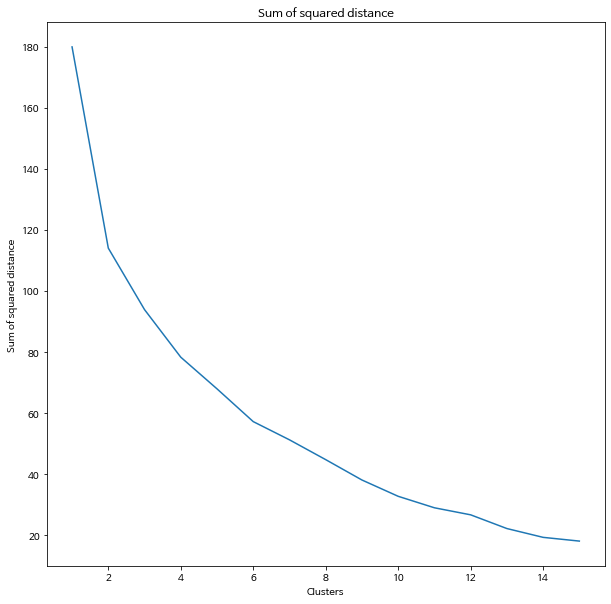

In [13]:
plt.figure(figsize=(10,10))
plt.plot(ds_error['NumberofCluster'],ds_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [16]:
clus=KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans=[i+1 for i in clus.labels_]
df_raw['ClusterKmeans']=cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,CLusterKmeans,ClusterKmeans
0,43,51,30,39,61,92,45,1,4,4
1,63,64,51,54,63,73,47,5,2,2
2,71,70,68,69,76,86,48,3,3,5
3,61,63,45,47,54,84,35,1,4,4
4,81,78,56,66,71,83,47,3,3,5


In [17]:
ds_summary_km=df_raw.drop("ClusterHierarchical",axis=1,inplace=False).groupby("ClusterKmeans").agg(["min","mean","max"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,CLusterKmeans_min,CLusterKmeans_mean,CLusterKmeans_max
0,1,68,70.000,72,82,82.500,83,72,77.500,83,...,71,77,80.000,83,31,33.000,35,2,2.500,3
1,2,50,65.100,82,53,68.600,90,39,50.300,68,...,75,54,72.900,85,34,40.800,52,2,3.900,5
2,3,40,50.500,69,37,48.500,62,33,45.250,57,...,55,49,58.250,64,25,35.250,49,1,1.000,1
3,4,43,58.167,67,51,57.667,63,30,42.167,47,...,66,74,81.333,92,33,38.833,45,4,4.000,4
4,5,65,74.625,85,60,75.875,85,54,62.750,71,...,88,74,79.125,86,46,55.000,72,2,2.875,3


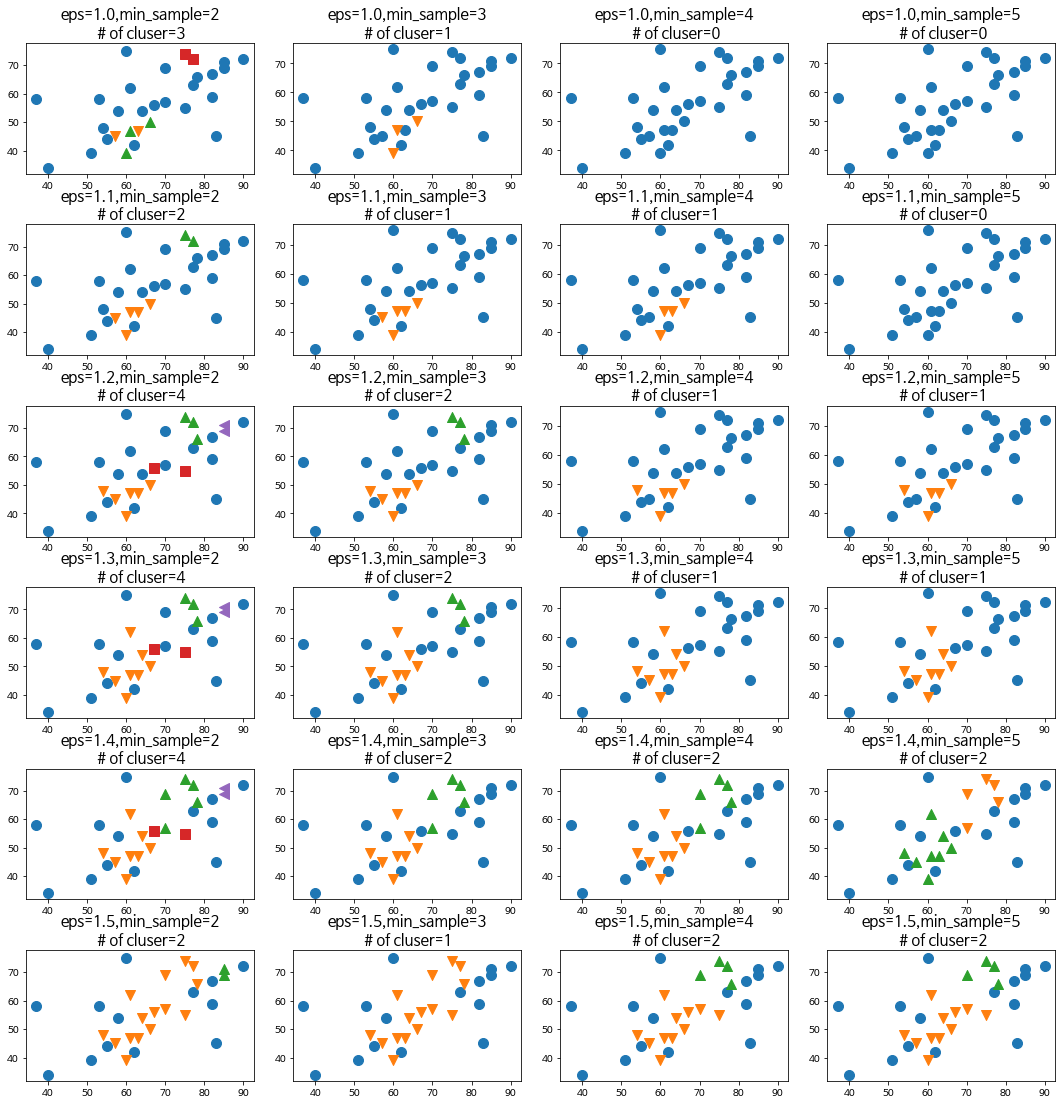

In [18]:
#DBSCAN 군집분석

X=df_raw["DISSATIS"]
Y=df_raw["CHANCE"]

markers=["o","v","^","s","<",">","p","D"]

para_eps=[k/10 for k in range(10,16,1)]
para_min_sample=[2,3,4,5]
fig,axes=plt.subplots(len(para_eps),len(para_min_sample),figsize=(15,15))
fig.tight_layout(w_pad=1,h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan=DBSCAN(min_samples=min_sample, eps=eps)
        clusters=dbscan.fit_predict(df_raw_x)
        clusters=clusters+1
        for(n_clus,clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters==clus], Y[clusters==clus],marker=markers[n_clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n # of cluser="+str(max(clusters)),fontsize=15)



In [19]:
dbscan=DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
cluster_dbscan=dbscan.labels_

for(i,val) in enumerate(cluster_dbscan):
    if val<0:
        cluster_dbscan[i]=0
    else:
        cluster_dbscan[i]=cluster_dbscan[i]+1
df_raw["ClusterDBScan"]=cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,CLusterKmeans,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,4,4,0
1,63,64,51,54,63,73,47,5,2,2,1
2,71,70,68,69,76,86,48,3,3,5,2
3,61,63,45,47,54,84,35,1,4,4,1
4,81,78,56,66,71,83,47,3,3,5,2


In [20]:
ds_summary_db=df_raw.drop(["ClusterHierarchical","ClusterKmeans"],
                          axis=1,inplace=False).groupby("ClusterDBScan").agg(["min","mean","max"])
level0=ds_summary_db.columns.get_level_values(0)
level1=ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns=level0+"_"+level1
ds_summary_db.reset_index(inplace=True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,CLusterKmeans_min,CLusterKmeans_mean,CLusterKmeans_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,88,49,70.615,92,25,41.923,72,1,2.692,5
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,66,73,78.625,84,33,39.125,47,2,3.500,4
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,80,77,81.800,86,46,47.200,49,3,3.200,4
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,70,66,67.000,68,35,38.000,41,5,5.000,5
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,79,74,76.500,79,55,59.000,63,3,3.000,3


# 연관규칙

In [33]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [36]:
df_raw=[['소주','콜라','맥주'],
        ['소주','콜라','와인'],
        ['소주','주스'],
        ['콜라','맥주'],
        ['소주','콜라','맥주','와인'],
        ['주스']]
df_raw

[['소주', '콜라', '맥주'],
 ['소주', '콜라', '와인'],
 ['소주', '주스'],
 ['콜라', '맥주'],
 ['소주', '콜라', '맥주', '와인'],
 ['주스']]

In [38]:
enc=TransactionEncoder()
df_raw_enc=enc.fit_transform(X=df_raw)
df_asso=pd.DataFrame(df_raw_enc, columns=enc.columns_)
df_asso.head()

,맥주,소주,와인,주스,콜라
0,True,True,False,False,True
1,False,True,True,False,True
2,False,True,False,True,False
3,True,False,False,False,True
4,True,True,True,False,True


In [39]:
min_support=0.5

df_freq=apriori(df_asso, min_support=0.5, use_colnames=True)
df_freq.round(3)

,support,itemsets
0,0.500,(맥주)
1,0.667,(소주)
2,0.667,(콜라)
3,0.500,"(콜라, 맥주)"
4,0.500,"(콜라, 소주)"


In [40]:
df_asso_rule=association_rules(df_freq, metric='confidence',min_threshold=0.5)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(콜라),(맥주),0.667,0.500,0.5,0.75,1.500,0.167,2.000
1,(맥주),(콜라),0.500,0.667,0.5,1.00,1.500,0.167,inf
2,(콜라),(소주),0.667,0.667,0.5,0.75,1.125,0.056,1.333
3,(소주),(콜라),0.667,0.667,0.5,0.75,1.125,0.056,1.333
